In [1]:
#for working with csv file we need pandas library
import pandas as pd

In [2]:
#reading the dataset
df=pd.read_csv("Dataset/day.csv")

In [3]:
df.sample(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
449,450,26-03-2019,2,1,3,0,1,1,1,18.279153,21.9375,47.7917,25.917007,795,4763,5558
715,716,17-12-2019,4,1,12,0,1,1,2,16.126653,20.0750,90.7083,6.583306,212,4373,4585
238,239,27-08-2018,3,0,8,0,6,0,2,27.880000,31.7778,85.0000,25.166339,226,889,1115
609,610,02-09-2019,3,1,9,0,0,0,2,28.563347,32.4500,81.5000,4.292744,2613,3197,5810
109,110,20-04-2018,2,0,4,0,3,1,1,24.395000,28.2196,61.4167,16.208975,613,3331,3944


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Make the data ready to feed the model.
Here dependent variable is "cnt".
Now do the feature engineering.
1. Are there any missing values?
2. Which features are the relevant?
3. Are all features in numeric?
4. Is standarization/Normalization needed? 

Handling Missing Values

In [5]:
# dependent variable:cnt

In [6]:
#Checking missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We do not have any missing value in dataset.

Convert Categorical Variables

In [7]:
df = df.drop(['instant', 'dteday', 'casual','registered'], axis=1)


In [8]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
df_cat=df.iloc[:, :7]

In [10]:
df_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,6,0,2
1,1,0,1,0,0,0,2
2,1,0,1,0,1,1,1
3,1,0,1,0,2,1,1
4,1,0,1,0,3,1,1


In [11]:
df_num=df.iloc[:,7:12]

In [12]:
df_num.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000


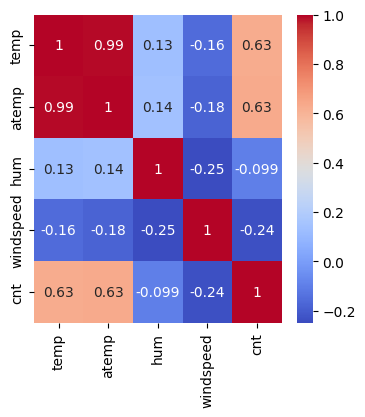

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df_num.corr()
print(correlation_matrix)
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [14]:
#temp and atemp are highly correlated droping temp as atemp has slightly high correaltion
df_num=df_num.drop(['temp'],axis=1)

In [15]:
df_num.head()

,atemp,hum,windspeed,cnt
0,18.18125,80.5833,10.749882,985
1,17.68695,69.6087,16.652113,801
2,9.47025,43.7273,16.636703,1349
3,10.60610,59.0435,10.739832,1562
4,11.46350,43.6957,12.522300,1600


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
df_num_scaled=scaler.fit_transform(df_num.iloc[:,:-1])

In [19]:
df_num_scaled=pd.DataFrame(df_num_scaled, columns=['atemp', 'hum', 'windspeed'])

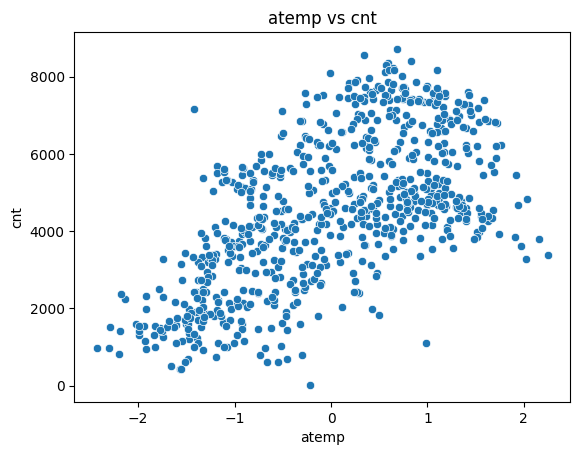

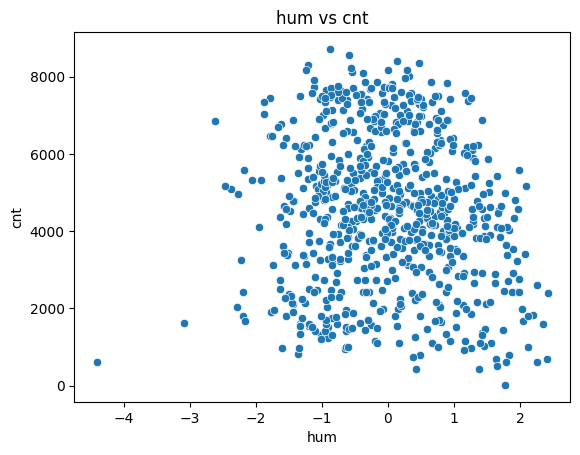

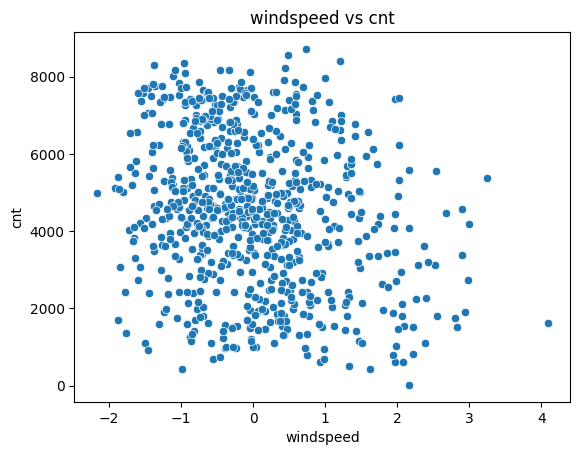

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = ["atemp", "hum", "windspeed"]

# Create scatterplots
for feature in features:
    sns.scatterplot(x=df_num_scaled[feature], y=df_num["cnt"])
    plt.title(f"{feature} vs cnt")
    plt.xlabel(feature)
    plt.ylabel("cnt")
    plt.show()


In [21]:
df_num=pd.concat([df_num_scaled,df_num.iloc[:,-1]],axis=1)

In [22]:
df_num.head()

,atemp,hum,windspeed,cnt
0,-0.680818,1.252343,-0.387833,985
1,-0.741507,0.480996,0.748899,801
2,-1.750344,-1.338073,0.745931,1349
3,-1.610886,-0.261577,-0.389769,1562
4,-1.505615,-1.340294,-0.046477,1600


In [23]:
df_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,6,0,2
1,1,0,1,0,0,0,2
2,1,0,1,0,1,1,1
3,1,0,1,0,2,1,1
4,1,0,1,0,3,1,1


In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
# Initialize the encoder
encoder = OneHotEncoder(drop="first")

In [26]:
# Fit and transform the data
encoded_data = encoder.fit_transform(df_cat[['season','yr','mnth','holiday','weekday','workingday','weathersit']])

In [27]:
# Convert to a DataFrame for better readability
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['season','yr','mnth','holiday','weekday','workingday','weathersit']))


In [28]:
# Reset the index to align with the original DataFrame
encoded_df.index = df_cat.index


In [29]:
encoded_df.head()

,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
encoded_df=encoded_df.corr()

In [31]:
encoded_df.head()

,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
season_2,1.000000e+00,-3.418943e-01,-3.296500e-01,2.206711e-17,-1.673311e-01,7.211912e-02,5.154964e-01,5.248014e-01,2.857575e-01,-1.768562e-01,...,-0.024408,0.004803,-1.928926e-03,0.009410,-1.928926e-03,-1.928926e-03,-0.004187,0.015091,0.040011,-0.043283
season_3,-3.418943e-01,1.000000e+00,-3.344412e-01,1.735530e-16,-1.697631e-01,-1.794266e-01,-1.762453e-01,-1.794266e-01,5.187361e-02,5.172832e-01,...,-0.026393,-0.009294,1.939879e-03,0.004265,1.090261e-02,1.939879e-03,-0.000367,0.016775,-0.101756,-0.026393
season_4,-3.296500e-01,-3.344412e-01,1.000000e+00,-1.086464e-16,-1.636834e-01,-1.730008e-01,-1.699334e-01,-1.730008e-01,-1.699334e-01,-1.730008e-01,...,0.016785,0.003611,5.851436e-03,-0.001055,-3.275804e-03,-3.275804e-03,-0.005479,-0.004623,0.033857,0.093128
yr_1,2.206711e-17,1.735530e-16,-1.086464e-16,1.000000e+00,-2.801585e-16,1.599112e-16,-9.309567e-17,7.671648e-17,-2.089634e-16,1.465455e-16,...,0.008195,0.003904,-1.950413e-16,-0.003935,-1.086706e-16,-5.819694e-17,-0.003904,-0.002945,-0.005796,-0.073758
mnth_2,-1.673311e-01,-1.697631e-01,-1.636834e-01,-2.801585e-16,1.000000e+00,-8.781560e-02,-8.625858e-02,-8.781560e-02,-8.625858e-02,-8.781560e-02,...,0.011980,-0.000804,3.227693e-04,0.001458,3.227693e-04,3.227693e-04,-0.000804,-0.003093,-0.009487,-0.018814


In [32]:
# Filter correlations by threshold
threshold = 0.8
high_corr = encoded_df[(encoded_df.abs() > threshold) & (encoded_df != 1.0)]

In [33]:
# Drop rows and columns with all NaN values for a cleaner display
high_corr_cleaned = high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)

print("High Correlations:\n", high_corr_cleaned)

High Correlations:
 Empty DataFrame
Columns: []
Index: []
